<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h3 align="center">Instructor: Dr. Pilaram</h3>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>
<h4 align="center">Computer Assignment 1</h4>


### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

import random    # Added by me


# Problem 1:  
## 1-1 Gaussian Elimination  ``(20 pt.)``

### Part 1:


Gaussian elimination transforms a matrix into its row echelon form using the following steps:

1. **Partial Pivoting**: If necessary, swap rows to bring the largest (in absolute value) element to the pivot position.
2. **Row Elimination**: Use row operations to make all entries below the pivot zero by subtracting suitable multiples of the pivot row from the rows below.

---

Write a Python function `gaussian_elimination(matrix)` that performs **Gaussian elimination** on a given square matrix.

- The function should return the upper triangular form of the matrix and number of row swaps as a tuple.We will use number of row swaps in determinant calculation.
- You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

---

### Example

**Input:**

$$
\begin{bmatrix}
-1 & 2 & 1 \\
-4 & 0 & -3 \\
-4 & 0 & -2
\end{bmatrix}
$$

**Output:**

$$
\begin{bmatrix}
-4 & 0 & -3 \\
 0 & 2 & 1.75 \\
 0 & 0 & 1
\end{bmatrix}
$$


In [339]:
def gaussian_elimination(matrix):
    #TODO

    num_swaps = 0

    A = matrix
    
    for i in range(A.shape[0]):
        
        row_number = i + 1
        pivot_value = A[i,i]
        pivot_index = i
        
        for j in range(A.shape[0] - row_number):
            if abs(A[row_number + j , i]) > abs(pivot_value):
                pivot_value = A[row_number + j , i]
                pivot_index = row_number + j
        
        if pivot_index != i:
            A[[i,pivot_index]] = A[[pivot_index,i]]
            num_swaps += 1    
        
        for j in range(A.shape[0] - row_number):
            A[j + row_number , :] -= (A[j + row_number , i] / A[i,i]) * A[i,:]

    return A, num_swaps  

In [340]:
# Evaluation Cell
# Do not change anything here

myprint=False # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, n))
    pl, expected_A_ref = lu(A, permute_l=True)
    result_ref = gaussian_elimination(A.astype(float))[0]
    if(myprint):
        print(f"Test Case {i + 1}:")
        print(A)
        print("User Output :")
        print(result_ref)
        print("Expected Output :")
        print(expected_A_ref)
    assert np.allclose(result_ref, expected_A_ref), "Test Case Failed: The result does not match the expected REF."

print("All test cases passed!")


All test cases passed!


### Part 2: Pivots and Determinant

Gaussian elimination not only helps solve systems of equations but also provides valuable information about the rank and determinant of a matrix:

- The **determinant** of a matrix can be calculated by multiplying the pivot elements in the upper triangular matrix obtained through Gaussian elimination. If any pivot is zero, the determinant is zero.
- **Row swaps** during Gaussian elimination affect the determinant. Each time two rows are swapped, the sign of the determinant changes (i.e., the determinant is multiplied by -1). This is important to consider when calculating the final determinant.

---

Write a Python function `matrix_rank_determinant(matrix)` that:

1. Uses the `gaussian_elimination` function from part 1.
2. Returns a tuple `(rank, determinant)`


In [341]:
def matrix_determinant(matrix):
    #TODO
    n = matrix.shape[0]

    gaussian_eliminated = gaussian_elimination(matrix.astype(float))[0]
    num_swaps = gaussian_elimination(matrix.astype(float))[1]

    determinant = 1

    for i in range(n):
        determinant *= gaussian_eliminated[i,i]

    determinant = determinant * (-1)**num_swaps
    
    return determinant  


In [342]:
# Evaluation Cell 
# Do not change anything here
myprint = False  # Set this to True to see test cases
np.random.seed(42)

for i in range(1000):
    n = np.random.randint(2, 10)  
    A = np.random.randint(-10, 10, size=(n, n))
    expected_determinant = np.linalg.det(A)
    user_determinant = matrix_determinant(A.astype(float))  

    if myprint:
        print(f"Test Case {i + 1}:")
        print("Matrix A:")
        print(A)
        print("User Output (Determinant):")
        print(user_determinant)
        print("Expected Output (Determinant):")
        print(expected_determinant)

    assert abs(user_determinant - expected_determinant)< 1e-4, "Test Case Failed: The determinant does not match the expected value."
   
print("All test cases passed!")


All test cases passed!


  ## 1-2 Reduced Row Echelon Form (RREF)  ``(20 pt.)``

### Part 1:  
In this section, we will implement a function that performs **Reduced Row Echelon Form (RREF)** on a given matrix.

The **RREF** of a matrix is obtained by performing the following steps:

1. **Pivots**: The first non-zero entry in each row is called pivot. In RREF, the pivot in any non-zero row is 1, and it is the only non-zero entry in its column.
2. **Row Reduction**: We aim to make every element below and above each pivot zero using suitable row operations.
3. **Order of Pivots**: The pivots must appear in successive columns from left to right as you go down the rows.

---

- Implement the function `rref(matrix)` that will transform a matrix into its **reduced row echelon form (RREF)**.
- You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

---

### Example:

**Input:**

$$
\begin{bmatrix}
1 & 2 & 1 & 3 & 3 \\
2 & 4 & 0 & 4 & 4 \\
1 & 2 & 3 & 5 & 5 \\
2 & 4 & 0 & 4 & 7
\end{bmatrix}
$$

**output:**

$$
\begin{bmatrix}
 1 & 2 & 0 & 2 & 0 \\
 0 & 0 & 1 & 1 & 0 \\
 0 & 0 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$


In [4]:
def rref(matrix):
    #TODO

    A = np.float_(matrix)
    
    rows = A.shape[0]
    cols = A.shape[1]
    
    row = 0
    
    for col in range(cols):
        if row >= rows:
            break
        
        pivot_row = None
        for i in range(row, rows):
            if A[i][col] != 0:
                pivot_row = i
                break
        
        if pivot_row is None:
            continue
        
        if pivot_row != row:
            A[[row,pivot_row]] = A[[pivot_row,row]]
        
        pivot = A[row][col]
        A[row,:] /= pivot
        
        for i in range(rows):
            if i != row and A[i][col] != 0:
                factor = A[i][col]
                A[i,:] = A[i,:] - factor * A[row,:]
        
        row += 1

    return A

### Part 2: Rank of a Matrix

Write a function `rank_of_matrix(matrix)` that returns the rank of a matrix by transforming the matrix into its RREF.

 ---
 
### Example:

For the matrix:

$$
\begin{bmatrix}
1 & 2 & 1 & 3 & 3 \\
2 & 4 & 0 & 4 & 4 \\
1 & 2 & 3 & 5 & 5 \\
2 & 4 & 0 & 4 & 7
\end{bmatrix}
$$

**Output:**

The rank of this matrix is `3`.



In [5]:
def rank_of_matrix(matrix):
    #TODO

    rrefMatrix = rref(matrix)

    rank = 0

    for i in range(rrefMatrix.shape[0]):
        isOne = False
        for j in range(rrefMatrix.shape[1]):
            if abs(rrefMatrix[i][j]) == 1 :
                isOne = True
                break
        if isOne == True:
            rank += 1
                
    return rank

In [7]:
# Evaluation Cell for Rank
# Do not change anything here
myprint = False  # Set this to True to see test cases
np.random.seed(42)

for i in range(500):
    n = np.random.randint(2, 10)
    m = np.random.randint(2, 10)
    A = np.random.randint(-10, 10, size=(n, m))  
    expected_rank = np.linalg.matrix_rank(A)  
    user_rank = rank_of_matrix(np.array(A))

    if myprint:
        print(f"Test Case {i + 1}:")
        print("Matrix A:")
        print(A)
        print("User Output (Rank):")
        print(user_rank)
        print("Expected Output (Rank):")
        print(expected_rank)

    assert user_rank == expected_rank, "Test Case Failed: The rank does not match the expected value."
    
print("All test cases passed!")


All test cases passed!


## 1-3 LU Decomposition  ``(10 pt.)``
### Part 1: 
**LU Decomposition** is a mathematical technique that factorizes a given square matrix
$\textbf{A} :n \times n$) into a lower triangular matrix $\textbf{L} :n \times n$) and an upper triangular matrix $\textbf{U} :n \times n$).

---

### Example

Consider the matrix A :

$$
A =
\begin{bmatrix}
2 & 2 & 2 \\
4 & 7 & 7 \\
6 & 18 & 22
\end{bmatrix}
$$

The LU decomposition of A results in:

$$
L =
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
3 & 4 & 1
\end{bmatrix}
$$

$$
U =
\begin{bmatrix}
2 & 2 & 2 \\
0 & 3 & 3 \\
0 & 0 & 4
\end{bmatrix}
$$

---

### Task

Implement a function called `LU_decomposition(matrix)` that performs LU decomposition on a given matrix without using any library functions for matrix operations. 

#### Note:
- The input matrix will not be singular, and you do not need to perform any row swaps.


In [346]:
def LU_decomposition(A):
    #TODO
    U = A

    L = np.identity(A.shape[0])
    
    for i in range(U.shape[0]):
        
        row_number = i + 1
        
        for j in range(U.shape[0] - row_number):
            L[j + row_number , i] = U[j + row_number , i] / U[i,i]
            U[j + row_number , :] -= (U[j + row_number , i] / U[i,i]) * U[i,:]
            
    return L, U

In [347]:
# Evaluation Cell 
# Do not change anything here

np.random.seed(42)
def generate_test_cases(num_cases=10):
    test_cases = []
    for _ in range(num_cases):
        n = np.random.randint(2, 10)
        L = np.tril(np.random.randn(n, n))
        U = np.triu(np.random.randn(n, n))
        np.fill_diagonal(L, np.random.rand(n) + 1)
        A = L @ U
        b = np.random.randn(n)  
        test_cases.append((A, b))
    return test_cases

test_cases = generate_test_cases()
for i, (A, _) in enumerate(test_cases):
    print(f"Evaluating LDU Decomposition for Test Case {i + 1}:")
    L, U = LU_decomposition(A.copy())
    assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
    assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"
    assert np.linalg.norm(A - L @ U) < 1e-10, "L, D, and U do not satisfy A = LDU"   
    print("LDU decomposition successful.")
    print("-" * 50)

Evaluating LDU Decomposition for Test Case 1:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 2:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 3:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 4:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 5:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 6:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 7:
LDU decomposition successful.
--------------------------------------------------
Evaluating LDU Decomposition for Test Case 8:
LDU decomposition successful.
-----------------------------------

### Part 2: Solving \(Ax = b\) using LU Decomposition

Once you have implemented the `LU_decomposition` function, you can use it to solve a linear system of equations in the form
The process involves two main steps:

1. Decompose the matrix \(A\) into \(L\) and \(U\) .
2. Solve the system using forward and back substitution :
   - First, solve for \(y\) in the equation \(Ly = b\) using forward substitution.
   - Then, solve for \(x\) in the equation \(Ux = y\) using back substitution.
---
#### Note:
-  You are **not allowed** to use any library functions for matrix operations . You must implement the method from scratch.

In [348]:
def solve_LU(A, b):
    #TODO
    L, U = LU_decomposition(A.copy())

    y = np.zeros(A.shape[0])
    x = np.zeros(A.shape[0])

    for i in range(A.shape[0]):
        c = 0
        for j in range(i):
            c += L[i,j] * y[j]
        y[i] = (b[i] - c)/L[i,i]

    for i in range(A.shape[0]):
        i_prime = A.shape[0] - i - 1
        c = 0
        for j in range(i):
            j_prime = A.shape[0] - j - 1
            c += U[i_prime,j_prime] * x[j_prime]
        x[i_prime] = (y[i_prime] - c)/U[i_prime,i_prime]
    
    return x

In [349]:
# Evaluation Cell 
# Do not change anything here

np.random.seed(42)
for i, (A, b) in enumerate(test_cases):
    print(f"Evaluating Solving Ax = b for Test Case {i + 1}:")
    x = solve_LU(A, b)    
    assert np.linalg.norm(A @ x - b) < 1e-10, f"Error: The solution x does not satisfy Ax = b for test case {i + 1}"    
    print("Successful.")
    print("-" * 50)


Evaluating Solving Ax = b for Test Case 1:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 2:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 3:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 4:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 5:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 6:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 7:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 8:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 9:
Successful.
--------------------------------------------------
Evaluating Solving Ax = b for Test Case 10:
Su


# Problem 2:  
# Introduction to Machine Learning

Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform specific tasks without explicit instructions. Instead of programming a computer to perform a task, machine learning allows it to learn from data and improve its performance over time. The primary goal of machine learning is to identify patterns and make predictions based on data.

## Purpose of Machine Learning

The main purpose of machine learning is to enable computers to analyze and interpret complex data sets. It empowers systems to automatically learn and adapt from experience, making it possible to tackle a wide range of tasks, such as:

- **Predictive Analytics**: Making predictions about future outcomes based on historical data.
- **Classification**: Identifying categories or classes for new observations.
- **Clustering**: Grouping similar data points together without predefined labels.
- **Recommendation Systems**: Suggesting products, movies, or other items based on user preferences and behavior.

---

## Supervised Learning

Supervised learning is a branch of machine learning where the model is trained on a labeled dataset. In this context, "labeled" means that each training example is paired with an output label or target value. The model learns to map input features to the corresponding output labels by minimizing the error between its predictions and the actual labels.

### Key Concepts of Supervised Learning

1. **Training Data**: The dataset used to train the model, consisting of input features and their corresponding output labels.
2. **Model**: The mathematical representation that learns to map inputs to outputs. It is trained using the training data.
3. **Prediction**: The process of using the trained model to infer outputs for new, unseen data.

---

Supervised learning can be further divided into two main types:

### 1. Classification

Classification is a type of supervised learning where the goal is to predict discrete labels or categories for given input data. The model learns from training data that consists of input features and their corresponding class labels. 

**Example**: Classifying emails as "spam" or "not spam" based on their content.

### 2. Regression

Regression is another type of supervised learning, where the aim is to predict continuous output values rather than discrete labels. The model learns to identify the relationship between input features and a continuous target variable.

**Example**: Predicting house prices based on various features such as size, location, and number of bedrooms.



In this homework assignment, you will explore the applications of linear algebra in machine learning by implementing basic algorithms for linear polynomial regression and the k-nearest neighbors (KNN) classification method. Through these exercises, you will gain a deeper understanding of how linear algebra underpins many machine learning techniques.





![picture](CHWpic.png)


## 2-1 Linear Regression  ``(15 pt.)``

In this section, we will explore the concept of **Linear Regression**, a fundamental technique in machine learning used for predicting a continuous output variable. The goal of linear regression is to find a linear relationship between the features and the output variable, allowing us to make predictions for unseen data.

---

### Mathematical Foundation

1. **Linear Model**:
   - The relationship can be expressed mathematically as:
   $$
   y = \beta_0 + \beta_1 x
   $$
   where \(y\) is the dependent variable, \(x\) is the independent variable, beta_0 is the intercept, and beta_1 is the slope of the line.

2. **Matrix Representation**:
   - For multiple observations, we use matrix notation:
   $$
   \mathbf{y} = \mathbf{X} \boldsymbol{\beta}
   $$
   Here:
   - X is the feature matrix (including a column of ones for the intercept).
   - beta is the coefficient vector.

3. **Least Squares Method**:
   - We minimize the error between predicted and actual values using the least squares method. The coefficients are calculated using the Normal Equation:
   $$
   \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
   $$


- First import the data needed for this problem.

In [350]:
train=pd.read_csv('RegressionTrain.csv')
test=pd.read_csv('RegressionTest.csv')

- This dataset provides insights into the relationship between engine characteristics (size and number of cylinders), fuel consumption, and the resulting CO2 emissions.
- We want to predict Co2Emissions produced  by different cars using linear regression.

In [351]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.0,230
4,3.5,6,10.1,232
...,...,...,...,...
839,3.2,6,11.2,258
840,3.0,6,11.8,271
841,3.2,6,11.5,264
842,3.0,6,11.8,271


- Create a scatter plot of CO2 emissions against the other three features of cars to identify which feature has a 
linear relationship with emissions.

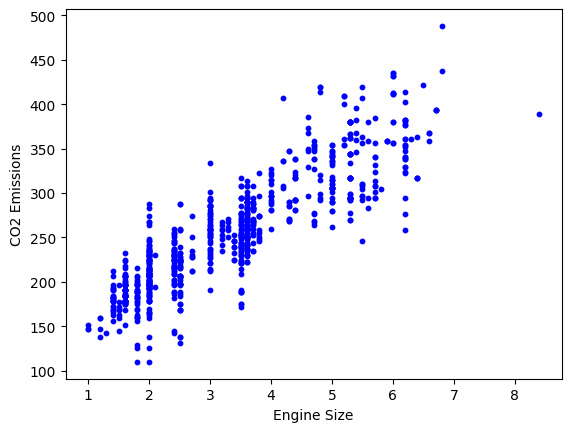

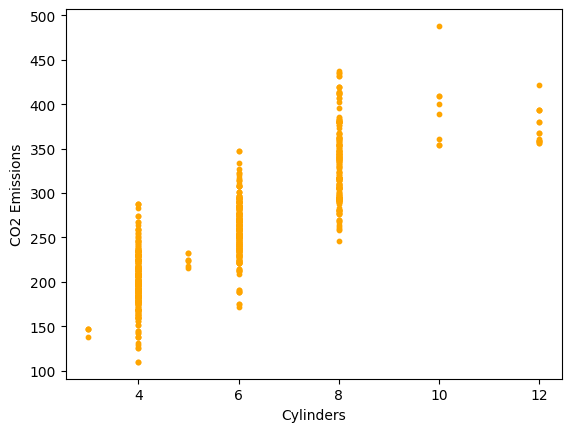

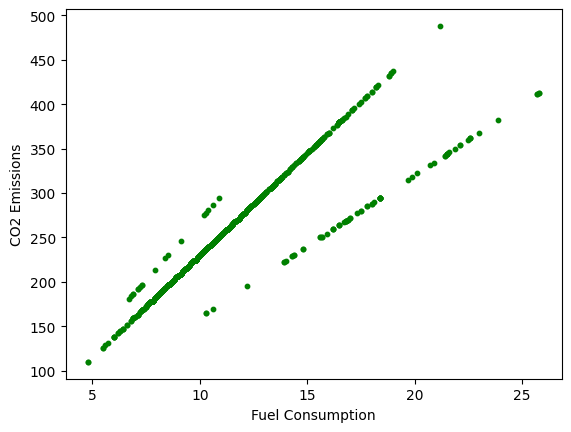

In [352]:
#TODO

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],c='blue',s=10)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

plt.scatter(train['CYLINDERS'],train['CO2EMISSIONS'],c='orange',s=10)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

plt.scatter(train['FUELCONSUMPTION_COMB'],train['CO2EMISSIONS'],c='green',s=10)
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()


#### Implementing Linear Regression for CO2 Emissions Prediction

Now that we have observed a significant linear relationship between engine size and CO2 emissions, we will implement the linear regression method using engine size to predict the CO2 emissions of test cars.

---

#### Steps to Follow

1. **Fit the Linear Regression Model**: Use linear algebra techniques discussed earlier to determine the best-fitting line for the training data.

2. **Extract Coefficient and Intercept**: After fitting the model, print the coefficient and intercept of the regression line.

3. **Visualize the Results**: Finally,plot the regression line alongside the training data to visually assess the fit of our model.




Intercept of the fitting line is: 
124.17950615726411
Slope of the fitting line is: 
39.40710017142077


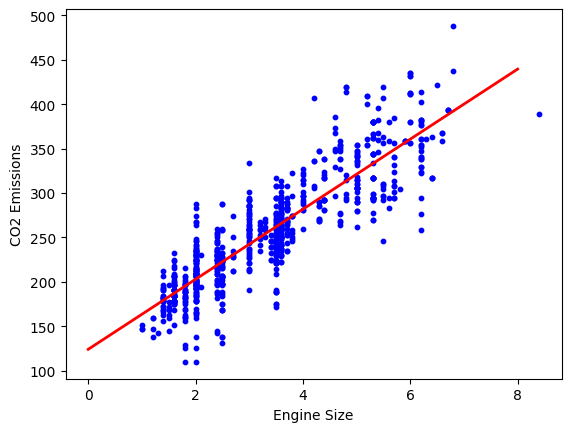

In [353]:
#TODO

engine_size = train['ENGINESIZE'].to_numpy()
y = train['CO2EMISSIONS'].to_numpy()
X = np.zeros((engine_size.shape[0], 2))

for i in range(engine_size.shape[0]):
    X[i,0] = 1
    X[i,1] = engine_size[i]

XT = X.T

XTX = np.dot(XT, X)

XTX_inverse = np.linalg.inv(XTX)

XTX_inv_XT = np.dot(XTX_inverse, XT)

Beta = np.dot(XTX_inv_XT, y)

print('Intercept of the fitting line is: ')
print(Beta[0])
print('Slope of the fitting line is: ')
print(Beta[1])

x = np.linspace(0,8,100)
line = Beta[1] * x + Beta[0]

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

#### Predicting Test Values and Evaluating the Model

Now that we have fitted the linear regression model to our training data, we will proceed to predict the CO2 emissions for the test dataset using the regression line.

---

#### Steps to Follow

1. **Make Predictions**: Use the fitted model to predict CO2 emissions for the test dataset.

2. **Evaluate the Model**: Implement functions to calculate the following evaluation metrics:
   - **Mean Absolute Error (MAE)**
   - **Mean Squared Error (MSE)**
   - **R-squared (R²)**

3. **Print the Evaluation Metrics**: Display the calculated values for MAE, MSE, and R².

4. **Visualize the Predictions**: Plot the regression line alongside the test data to assess the performance of our model visually.

In [354]:
def calculate_mae(actual, predicted):
    #TODO
    
    n = actual.shape[0]
    s = 0

    for i in range(n):
        s += abs(predicted[i] - actual[i])

    mae = s/n
    
    return mae

def calculate_mse(actual, predicted):
    #TODO

    n = actual.shape[0]
    s = 0

    for i in range(n):
        s += (predicted[i] - actual[i]) ** 2

    mse = s/n
    
    return mse

def calculate_r_squared(actual, predicted):
    #TODO

    n = actual.shape[0]
    average = np.mean(actual)
    RSS = 0
    TSS = 0

    for i in range(n):
        RSS += abs(predicted[i] - actual[i]) ** 2

    for i in range(n):
        TSS += abs(actual[i] - average) ** 2

    r_squared = 1 - RSS/TSS
    
    return r_squared

In [355]:
test_x = np.asanyarray(test[['ENGINESIZE']])  
test_y = np.asanyarray(test[['CO2EMISSIONS']]) 

#TODO

Intercept = 124.17950615726411
Slope = 39.40710017142077
predicted_emission = np.zeros((test_x.shape[0],1))
actual_emission = test_y

for i in range(test_x.shape[0]):
    predicted_emission[i] = Slope * test_x[i] + Intercept

mae = calculate_mae(actual_emission, predicted_emission)
mse = calculate_mse(actual_emission, predicted_emission)
r_squared = calculate_r_squared(actual_emission, predicted_emission)

print('MAE =', mae)
print('MSE =', mse)
print('R_Squared =', r_squared)

MAE = [24.19806083]
MSE = [961.33074333]
R_Squared = [0.73558024]


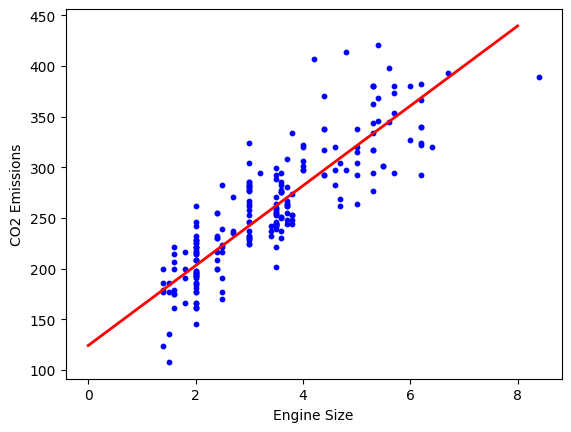

In [356]:
# Visualization

x = np.linspace(0,8,100)
line = Slope * x + Intercept

plt.scatter(test_x,test_y,c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

## 2-2 Polynomial Regression  ``(15 pt.)``

In this section, we will explore the concept of **Polynomial Regression**, an extension of linear regression that allows us to model non-linear relationships between the features and the output variable. The goal of polynomial regression is to find a polynomial relationship that best fits the data, allowing us to make predictions for unseen data.

---

### Mathematical Foundation

1. **Polynomial Model**:
   - The relationship can be expressed mathematically as:
   $$
   y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_d x^d
   $$

2. **Matrix Representation**:
   - For multiple observations, we can represent the polynomial relationship in matrix form:
   $$
   \mathbf{y} = \mathbf{X} \boldsymbol{\beta}
   $$
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^d \\
1 & x_2 & x_2^2 & \cdots & x_2^d \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^d
\end{bmatrix}
\]

3. **Least Squares Method**:
   - To find the best-fitting polynomial, we minimize the error between predicted and actual values using the least squares method. The coefficients are calculated using the Normal Equation:
   $$
   \boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
   $$
---
In this section, we will implement **Polynomial Regression** to evaluate how different polynomial degrees affect our metrics and visualizations. We will explore the impact of polynomial regression by using three different values of \(n\) for the polynomial degree. 

Our goal is to observe how varying the degree of the polynomial influences the performance metrics and the resulting plots. 

### Tasks
1. Implement polynomial regression for three different values of \(n\).
2. Evaluate and compare the performance metrics (MAE, MSE, R²).
3. Visualize the results to see how the polynomial degree affects the fit of the model.


In [336]:
#TODO

# My codes are in the next blocks

This section consists of three parts (n=3, n=4, n=5). Each part has three subparts. Note that before running the second and the third subpart in each part, you should run the first subpart.

#### n = 3

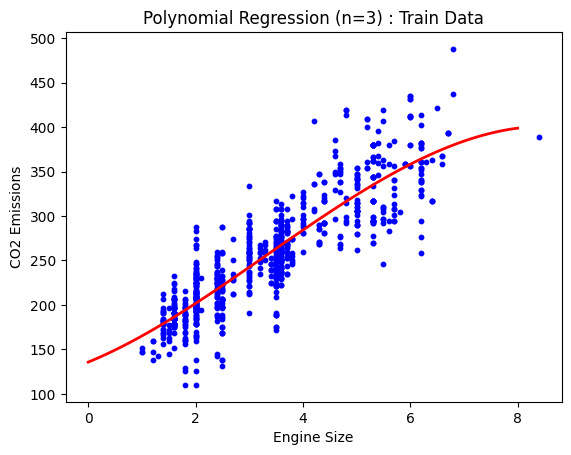

In [357]:
# Calculating the best fitting curve and visualizing it

engine_size = train['ENGINESIZE'].to_numpy()
y = train['CO2EMISSIONS'].to_numpy()
X = np.zeros((engine_size.shape[0], 4))

for i in range(engine_size.shape[0]):
    X[i,0] = 1
    X[i,1] = engine_size[i]
    X[i,2] = engine_size[i] ** 2
    X[i,3] = engine_size[i] ** 3
    
XT = X.T

XTX = np.dot(XT, X)

XTX_inverse = np.linalg.inv(XTX)

XTX_inv_XT = np.dot(XTX_inverse, XT)

Beta = np.dot(XTX_inv_XT, y)

x = np.linspace(0,8,100)
line = Beta[3] * x**3 + Beta[2] * x**2 + Beta[1] * x + Beta[0]

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=3) : Train Data')
plt.show()


In [358]:
# Calculating MAE, MSE, and R-Squared

predicted_emission = np.zeros((test_x.shape[0],1))
actual_emission = test_y

for i in range(test_x.shape[0]):
    predicted_emission[i] = Beta[3] * test_x[i]**3 + Beta[2] * test_x[i]**2 + Beta[1] * test_x[i] + Beta[0]

mae = calculate_mae(actual_emission, predicted_emission)
mse = calculate_mse(actual_emission, predicted_emission)
r_squared = calculate_r_squared(actual_emission, predicted_emission)

print('MAE =', mae)
print('MSE =', mse)
print('R_Squared =', r_squared)

MAE = [24.00384668]
MSE = [928.03221037]
R_Squared = [0.7447392]


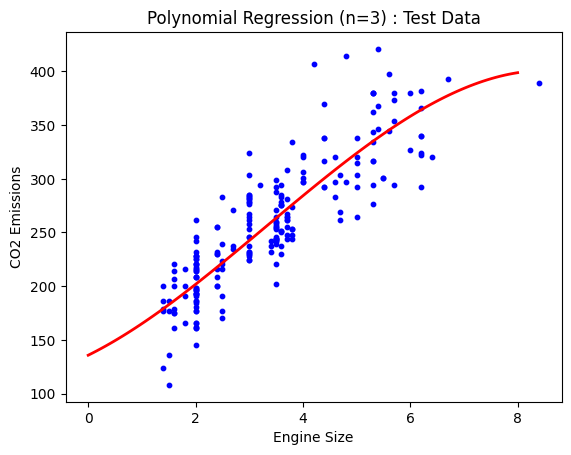

In [359]:
# Plotting the regression line alongside the test data to assess the performance of our model visually

plt.scatter(test_x,test_y,c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=3) : Test Data')
plt.show()

#### n = 4

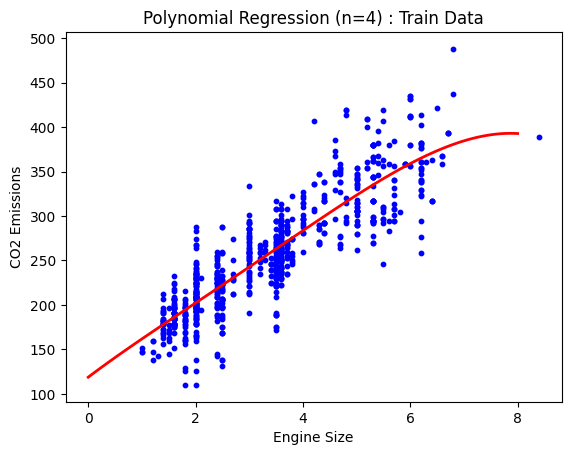

In [360]:
# Calculating the best fitting curve and visualizing it

engine_size = train['ENGINESIZE'].to_numpy()
y = train['CO2EMISSIONS'].to_numpy()
X = np.zeros((engine_size.shape[0], 5))

for i in range(engine_size.shape[0]):
    X[i,0] = 1
    X[i,1] = engine_size[i]
    X[i,2] = engine_size[i] ** 2
    X[i,3] = engine_size[i] ** 3
    X[i,4] = engine_size[i] ** 4
    
XT = X.T

XTX = np.dot(XT, X)

XTX_inverse = np.linalg.inv(XTX)

XTX_inv_XT = np.dot(XTX_inverse, XT)

Beta = np.dot(XTX_inv_XT, y)

x = np.linspace(0,8,100)
line = Beta[4] * x**4 + Beta[3] * x**3 + Beta[2] * x**2 + Beta[1] * x + Beta[0]

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=4) : Train Data')
plt.show()

In [361]:
# Calculating MAE, MSE, and R-Squared

predicted_emission = np.zeros((test_x.shape[0],1))
actual_emission = test_y

for i in range(test_x.shape[0]):
    predicted_emission[i] = Beta[4] * test_x[i]**4 + Beta[3] * test_x[i]**3 + Beta[2] * test_x[i]**2 + Beta[1] * test_x[i] + Beta[0]

mae = calculate_mae(actual_emission, predicted_emission)
mse = calculate_mse(actual_emission, predicted_emission)
r_squared = calculate_r_squared(actual_emission, predicted_emission)

print('MAE =', mae)
print('MSE =', mse)
print('R_Squared =', r_squared)

MAE = [23.92485491]
MSE = [927.8041887]
R_Squared = [0.74480192]


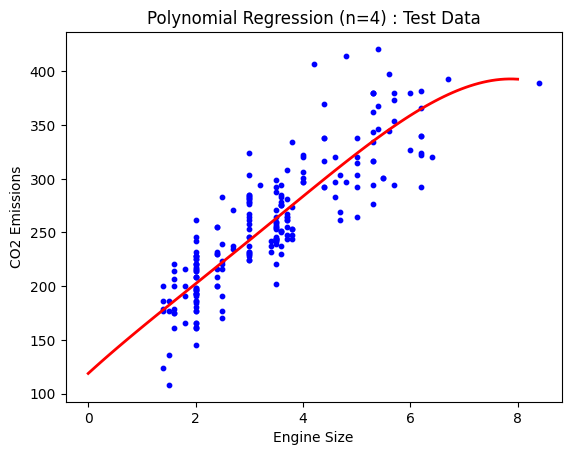

In [362]:
# Plotting the regression line alongside the test data to assess the performance of our model visually

plt.scatter(test_x,test_y,c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=4) : Test Data')
plt.show()

#### n = 5

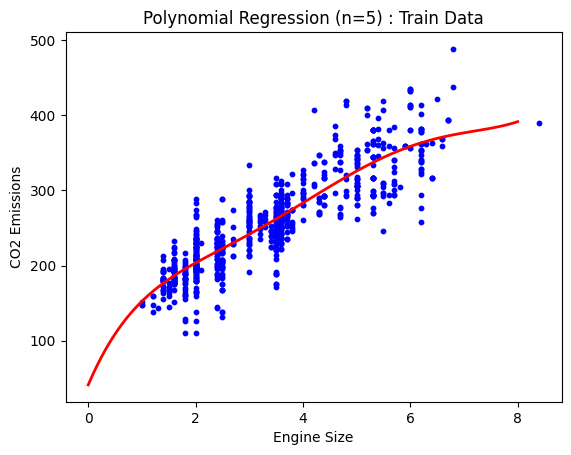

In [363]:
# Calculating the best fitting curve and visualizing it

engine_size = train['ENGINESIZE'].to_numpy()
y = train['CO2EMISSIONS'].to_numpy()
X = np.zeros((engine_size.shape[0], 6))

for i in range(engine_size.shape[0]):
    X[i,0] = 1
    X[i,1] = engine_size[i]
    X[i,2] = engine_size[i] ** 2
    X[i,3] = engine_size[i] ** 3
    X[i,4] = engine_size[i] ** 4
    X[i,5] = engine_size[i] ** 5
    
XT = X.T

XTX = np.dot(XT, X)

XTX_inverse = np.linalg.inv(XTX)

XTX_inv_XT = np.dot(XTX_inverse, XT)

Beta = np.dot(XTX_inv_XT, y)

x = np.linspace(0,8,100)
line = Beta[5] * x**5 + Beta[4] * x**4 + Beta[3] * x**3 + Beta[2] * x**2 + Beta[1] * x + Beta[0]

plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=5) : Train Data')
plt.show()

In [364]:
# Calculating MAE, MSE, and R-Squared

predicted_emission = np.zeros((test_x.shape[0],1))
actual_emission = test_y

for i in range(test_x.shape[0]):
    predicted_emission[i] = Beta[5] * test_x[i]**5 + Beta[4] * test_x[i]**4 + Beta[3] * test_x[i]**3 + Beta[2] * test_x[i]**2 + Beta[1] * test_x[i] + Beta[0]

mae = calculate_mae(actual_emission, predicted_emission)
mse = calculate_mse(actual_emission, predicted_emission)
r_squared = calculate_r_squared(actual_emission, predicted_emission)

print('MAE =', mae)
print('MSE =', mse)
print('R_Squared =', r_squared)

MAE = [23.98176239]
MSE = [925.65485748]
R_Squared = [0.74539311]


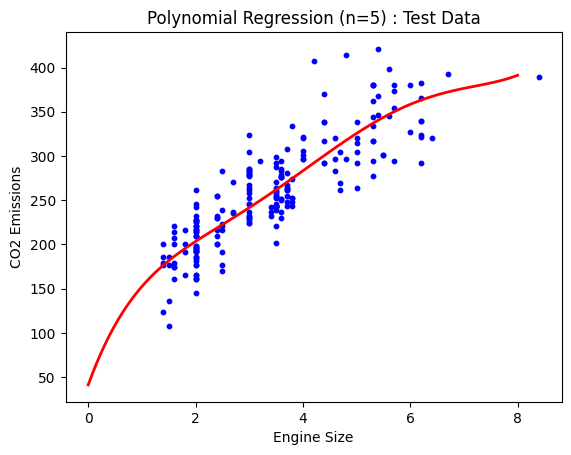

In [365]:
# Plotting the regression line alongside the test data to assess the performance of our model visually

plt.scatter(test_x,test_y,c='blue',s=10)
plt.plot(x,line,color='red',linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Polynomial Regression (n=5) : Test Data')
plt.show()

## 2-3 KNN  ``(20 pt.)``

In this exercise, we will implement an algorithm called **k-Nearest Neighbors** (k-NN), which is one of the commonly used machine learning algorithms. We will work with a well-known dataset called **Iris Flower**, which includes characteristics of 150 iris flowers. Each of these flowers belongs to one of three types: **Iris setosa**, **Iris versicolor**, and **Iris virginica**. The characteristics of each flower include the length and width of the sepal and petal. Using these characteristics, we can visualize each flower as a point in a four-dimensional space, where these four metrics determine the coordinates of that point.

---

In this exercise, we will implement an algorithm that predicts the type of an iris flower based on its characteristics. The k-NN algorithm works as follows:

Suppose you are given the characteristics of an iris flower and need to determine its type. The first idea that comes to mind is to measure its similarity to flowers whose types are known and predict its type based on this similarity. Imagine you have found 3 flowers that are most similar to the one in question. You know that among these 3 flowers, for instance, 2 belong to the Virginia type, and 1 belongs to the Setosa type. Surely, you would agree that according to the majority vote, the probability of our flower also being of the Virginia type is higher. Therefore, we will declare this type as our prediction.

This is exactly what the k-NN algorithm does. Typically, instead of finding the highest similarity, we compute the lowest distance (difference). The steps of this algorithm are as follows:

1. First, calculate the distance of the test sample (the one for which we want to predict the type) from all training samples (the ones whose types we know).
2. Next, find the k training samples that have the smallest distance to our test sample.
3. Now, we check which type is more prevalent among these k samples. We declare that type as our prediction for the test sample.

To calculate the distance between two points \(p\) and \(q\) with \(f\) features, we will use the following relation:

$$ d(p,q) = \sum_{i=0}^{f-1} (p_i - q_i)^2 $$

Now let's begin implementing each step of this algorithm.




![picture](CHWpic2.png)

### Part 1: Import data and convert them to numpy arrays

In [366]:
train=pd.read_csv('KNNTrain.csv')
test=pd.read_csv('KNNTest.csv')

In [367]:
train=pd.read_csv('KNNTrain.csv')
test=pd.read_csv('KNNTest.csv')

In [368]:
#we will convert our train and test data to numpy arrays
train_x = np.asanyarray(train[['SepalLength','SepalWidth','PetalLength','PetalWidth']])  
train_y = np.asanyarray(train[['Type']]).flatten()
test_x = np.asanyarray(test[['SepalLength','SepalWidth','PetalLength','PetalWidth']])
test_y = np.asanyarray(test[['Type']]).flatten() 

### Part 2: Finding k Nearest Neighbors

Using the implemented functions, we have been able to compute the distance of each test sample with each of the training samples, storing the results in `d`. This means that the distance of the test sample `test_x[i]` with the training sample `train_x[j]` is stored in the array `d[i][j]`. Now we need to find the k training samples with the smallest distance for each test sample. Set `k` equal to 10; therefore, the output array `k_nearest` will be a matrix of dimensions (30, 10).

In [369]:
#TODO

def find_k_nearest(k,d):
    
    new_d = np.argsort(d)
    k_nearest = new_d[:k]
    k_nearest = k_nearest.astype(int)
    
    return k_nearest
    
k = 10
d = np.zeros((test_x.shape[0],train_x.shape[0]))
k_nearest = np.zeros((test_x.shape[0],k))

for i in range(test_x.shape[0]):
    for j in range(train_x.shape[0]):
        d1 = (test_x[i][0] - train_x[j][0]) ** 2
        d2 = (test_x[i][1] - train_x[j][1]) ** 2
        d3 = (test_x[i][2] - train_x[j][2]) ** 2
        d4 = (test_x[i][3] - train_x[j][3]) ** 2
        d[i][j] = d1 + d2 + d3 + d4

for i in range(test_x.shape[0]):
     k_nearest[i,:] = find_k_nearest(k,d[i,:])

k_nearest = k_nearest.astype(int)

### Part 3: Finding the Type of k Nearest Neighbors

Now we have the indices of the nearest neighbors (training samples) for each test sample in the `k_nearest` array. However, we are looking for the type of each of those samples. To replace each of the indices with the type of the flower, you can use the `train_y` array. Perform this in one line and assign it to the variable `k_nearest_types`.

In [370]:
#TODO

k_nearest_types = train_y[k_nearest]

### Part 4: Determining the Type of New Flowers

Finally, we need to create an array named `predicted_types` , where `predicted_types[i]` contains the most frequent identifier in `k_nearest_types[i]` as the predicted type identifier for `test_x[i]`. 


In [371]:
#TODO

predicted_types = np.array([])

for i in range(test_y.shape[0]):
    unique,pos = np.unique(k_nearest_types[i,:],return_inverse=True)
    counts = np.bincount(pos)
    maxpos = counts.argmax()
    predicted_types = np.append(predicted_types, unique[maxpos], axis = None)

### Part 4: Evaluation
Evaluate the accuracy of your model. If you have completed all parts correctly, you should achieve an accuracy of 100%.


In [372]:
accuracy = sum(predicted_types==test_y)/len(test_y)
print('Accuracy:', accuracy)

Accuracy: 1.0


# Problem 3  ``(Bonus)``
# Pattern Association and Retrieving Data
 
In the world of machine learning and artificial intelligence, **pattern association** is a fundamental process where a system learns to link specific inputs to corresponding outputs. This concept is crucial in tasks such as classification, memory retrieval, and signal processing, where models must recognize, store, and retrieve patterns based on previous experiences or learned data.

One particularly valuable application of pattern association lies in the ability to retrieve accurate information from **noisy or disturbed data**. This ability is essential in various fields, including communication systems, image and audio processing, and memory-based models, where input data may be incomplete, corrupted, or altered. By leveraging pattern association, a system can reconstruct the original, accurate information from these noisy inputs, offering significant practical benefits.


## What is Pattern Association?

At its core, **pattern association** refers to the ability of a system—often a neural network or similar machine learning model—to learn relationships between different sets of data. In supervised learning, this means associating an input pattern (such as an image or piece of text) with an output pattern (such as a label or classification). The system "learns" these associations through repeated exposure to input-output pairs, gradually refining its internal structure (weights and connections in the case of neural networks) to minimize errors and make accurate predictions when presented with new data.


## Retrieving Data from Noisy or Disturbed Inputs

One of the most powerful uses of pattern association is in the retrieval of **noisy, incomplete, or disturbed data**. In many real-world scenarios, data can become corrupted by noise—random distortions or missing information. Whether it's a damaged image, a noisy audio recording, or an error-prone transmission, the challenge is to reconstruct the original, accurate data from this noisy input.

Pattern association allows a system to identify the underlying structure or features of the noisy data, compare it to learned patterns, and "fill in the gaps" to restore the original information. This is particularly effective in **associative memory systems**, which store patterns in such a way that partial or noisy versions of an input can trigger the recall of the full, correct pattern.
In this problem we are going to use one simplest pattern association techniques called Hebbian rule to implement a network which can retrieve noisy or disturbed data. Please read the first 4 pages of chapter 3 from the book <a href="https://dl.matlabyar.com/siavash/Neural%20Network/Book/Fausett%20L.-Fundamentals%20of%20Neural%20Networks_%20Architectures,%20Algorithms,%20and%20Applications%20(1994).pdf">**Fundamentals of neural networks**</a> and solve the following problem

---

## Problem

- Derive Hebbian Network for associating 7×7  character patterns (first row) in to 5×3 patterns (second row). You can assume that black pixels are -1 and white pixels are +1.
  <img src="CHWpic3.png" alt="picture" width="500"/>

- We want to examine our network against noise and missing point. In this context, missing points are some random pixels from 7×7 patterns that their values have changed from -1 or 1 to 0. For example in the following picture 10% of pixels are missed
  <img src="CHWpic4.png" alt="picture" width="400"/>

Noise means that some points pictures become negative.For example in the following picture is a character with 30% noise.
  <img src="CHWpic5.png" alt="picture" width="400"/>

## Task
For each character (A,B,C) Randomly generate missing point characters and noisy characters with percents range from 10 to 90. Examine the ability of recovering these characters. How would you explain it?


In [206]:
#TODO

### Deriving Hebbian Network

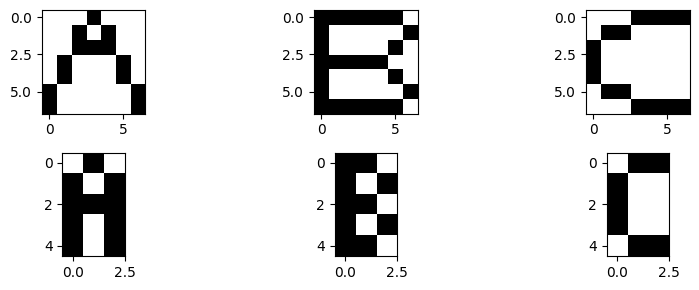

In [280]:
A_77 = np.array([[ 1, 1, 1,-1, 1, 1, 1],
                 [ 1, 1,-1, 1,-1, 1, 1],
                 [ 1, 1,-1,-1,-1, 1, 1],
                 [ 1,-1, 1, 1, 1,-1, 1],
                 [ 1,-1, 1, 1, 1,-1, 1],
                 [-1, 1, 1, 1, 1, 1,-1],
                 [-1, 1, 1, 1, 1, 1,-1]])

B_77 = np.array([[-1,-1,-1,-1,-1,-1, 1],
                 [-1, 1, 1, 1, 1, 1,-1],
                 [-1, 1, 1, 1, 1,-1, 1],
                 [-1,-1,-1,-1,-1, 1, 1],
                 [-1, 1, 1, 1, 1,-1, 1],
                 [-1, 1, 1, 1, 1, 1,-1],
                 [-1,-1,-1,-1,-1,-1, 1]])

C_77 = np.array([[ 1, 1, 1,-1,-1,-1,-1],
                 [ 1,-1,-1, 1, 1, 1, 1],
                 [-1, 1, 1, 1, 1, 1, 1],
                 [-1, 1, 1, 1, 1, 1, 1],
                 [-1, 1, 1, 1, 1, 1, 1],
                 [ 1,-1,-1, 1, 1, 1, 1],
                 [ 1, 1, 1,-1,-1,-1,-1]])

A_53 = np.array([[ 1,-1, 1],
                 [-1, 1,-1],
                 [-1,-1,-1],
                 [-1, 1,-1],
                 [-1, 1,-1]])

B_53 = np.array([[-1,-1, 1],
                 [-1, 1,-1],
                 [-1,-1, 1],
                 [-1, 1,-1],
                 [-1,-1, 1]])

C_53 = np.array([[ 1,-1,-1],
                 [-1, 1, 1],
                 [-1, 1, 1],
                 [-1, 1, 1],
                 [ 1,-1,-1]])

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_77, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_77, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_77, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(A_53, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(B_53, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(C_53, cmap='gray')

plt.tight_layout()

In [275]:
A_s = A_77.flatten().reshape((49,1))
A_t = A_53.flatten().reshape((15,1))
B_s = B_77.flatten().reshape((49,1))
B_t = B_53.flatten().reshape((15,1))
C_s = C_77.flatten().reshape((49,1))
C_t = C_53.flatten().reshape((15,1))

Hebbian_Matrix = np.dot(A_s,A_t.T) + np.dot(B_s,B_t.T) + np.dot(C_s,C_t.T)

Hebbian_Matrix = Hebbian_Matrix.reshape((49,15))

print('The Hebbian Matrix')
Hebbian_Matrix

The Hebbian Matrix


array([[ 3, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -3],
       [ 3, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -3],
       [ 3, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -3],
       [-1,  3, -1,  3, -3,  1,  3,  1, -1,  3, -3,  1,  1,  1,  1],
       [ 1,  1,  1,  1, -1, -1,  1, -1, -3,  1, -1, -1, -1,  3, -1],
       [ 1,  1,  1,  1, -1, -1,  1, -1, -3,  1, -1, -1, -1,  3, -1],
       [-1, -1,  3, -1,  1, -3, -1, -3, -1, -1,  1, -3, -3,  1,  1],
       [ 3, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -3],
       [-1, -1,  3, -1,  1, -3, -1, -3, -1, -1,  1, -3, -3,  1,  1],
       [-3,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  3],
       [ 1, -3,  1, -3,  3, -1, -3, -1,  1, -3,  3, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1,  1, -1,  1,  3, -1,  1,  1,  1, -3,  1],
       [ 1, -3,  1, -3,  3, -1, -3, -1,  1, -3,  3, -1, -1, -1, -1],
       [ 3, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -3],
       [ 1,  1,  1,  1, -1, -1,  1

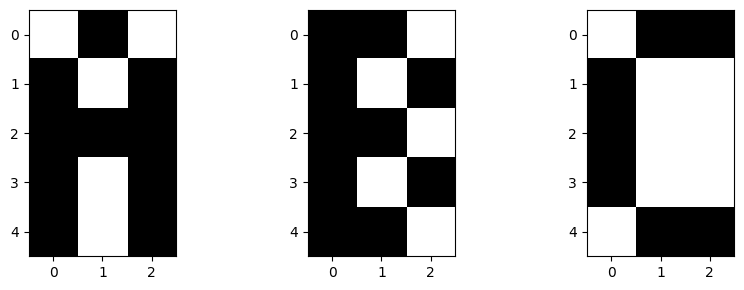

In [310]:
# Now we test the validity of the calculated network

def Hebbian_map(input):
    input_vector = input.flatten().reshape((1,49))
    output = np.dot(input_vector,Hebbian_Matrix).reshape((5,3))

    output = np.where(output > 1, np.ones((5,3)), -1) # Activation Function

    return output

output_A = Hebbian_map(A_77.copy())
output_B = Hebbian_map(B_77.copy())
output_C = Hebbian_map(C_77.copy())

plt.figure(figsize=(9, 3))

plt.subplot(1, 3, 1)
plt.imshow(output_A, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(output_B, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(output_C, cmap='gray')

plt.tight_layout()

As we can see the calculated network works finely.

### Effect of Missing Points

In [303]:
def make_missing_points(input,n):
    
    output = input.reshape((49,1))
    x = random.sample(range(49), n)
    
    for i in range(n):
        index = x[i]
        output[index] = 0

    output = output.reshape((7,7))
    
    return output

#### 10% missing points

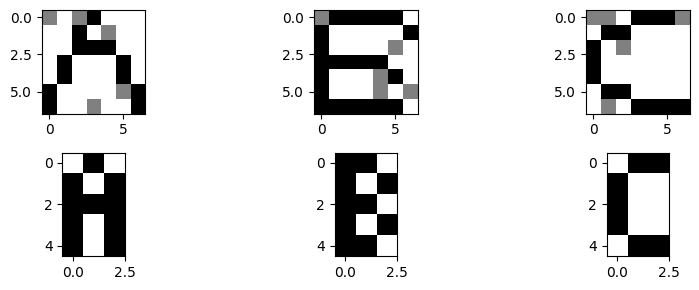

In [311]:
A_missing_points = make_missing_points(A_77.copy(),5)
B_missing_points = make_missing_points(B_77.copy(),5)
C_missing_points = make_missing_points(C_77.copy(),5)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 20% missing points

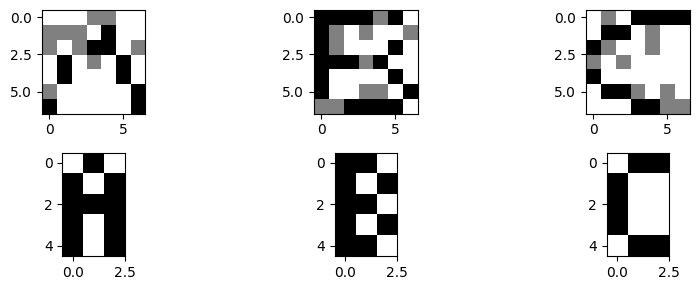

In [312]:
A_missing_points = make_missing_points(A_77.copy(),10)
B_missing_points = make_missing_points(B_77.copy(),10)
C_missing_points = make_missing_points(C_77.copy(),10)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 40% missing points

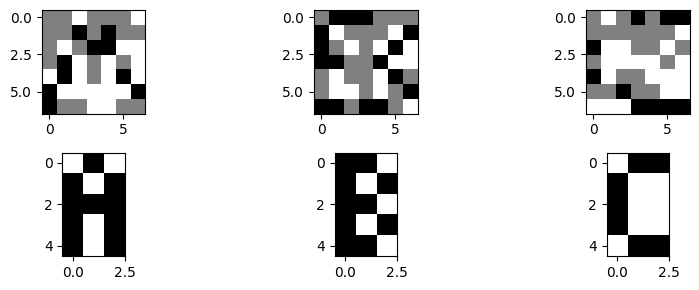

In [316]:
A_missing_points = make_missing_points(A_77.copy(),20)
B_missing_points = make_missing_points(B_77.copy(),20)
C_missing_points = make_missing_points(C_77.copy(),20)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 60% missing points

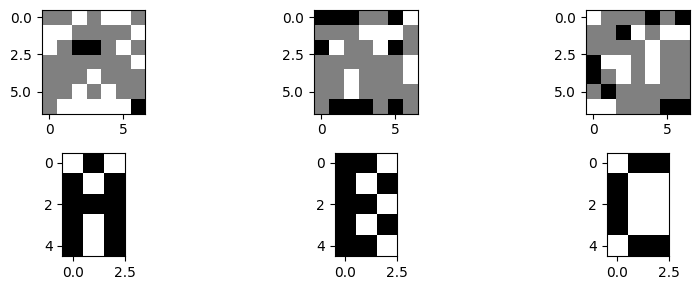

In [317]:
A_missing_points = make_missing_points(A_77.copy(),29)
B_missing_points = make_missing_points(B_77.copy(),29)
C_missing_points = make_missing_points(C_77.copy(),29)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 80% missing points

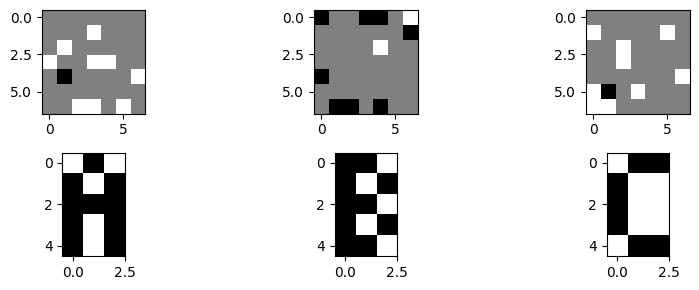

In [318]:
A_missing_points = make_missing_points(A_77.copy(),39)
B_missing_points = make_missing_points(B_77.copy(),39)
C_missing_points = make_missing_points(C_77.copy(),39)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 90% missing points

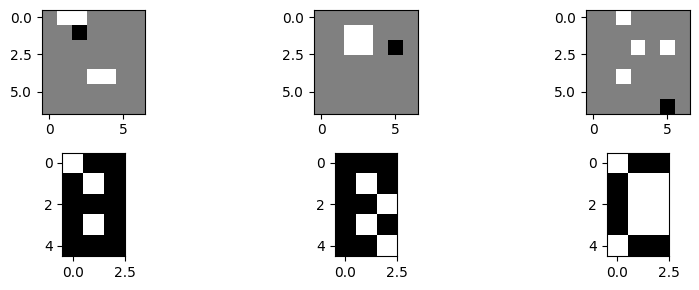

In [321]:
A_missing_points = make_missing_points(A_77.copy(),44)
B_missing_points = make_missing_points(B_77.copy(),44)
C_missing_points = make_missing_points(C_77.copy(),44)

retrieved_A = Hebbian_map(A_missing_points.copy())
retrieved_B = Hebbian_map(B_missing_points.copy())
retrieved_C = Hebbian_map(C_missing_points.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_missing_points, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_missing_points, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_missing_points, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

As we can see the network works fine even if we add up to 80 percent missing points to our inputs.

### Effect of Noise

In [322]:
def add_noise(input,n):
    
    output = input.reshape((49,1))
    x = random.sample(range(49), n)
    
    for i in range(n):
        index = x[i]
        output[index] *= -1

    output = output.reshape((7,7))
    
    return output

#### 10% noise

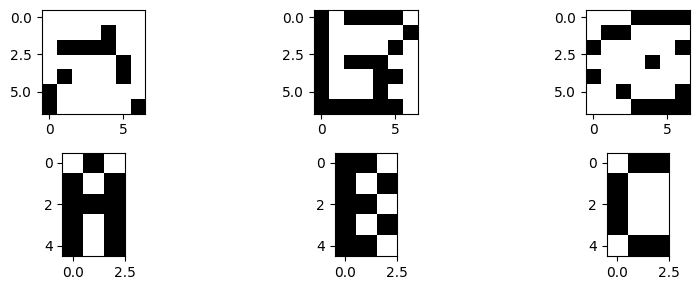

In [323]:
A_noisy = add_noise(A_77.copy(),5)
B_noisy = add_noise(B_77.copy(),5)
C_noisy = add_noise(C_77.copy(),5)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 20% noise

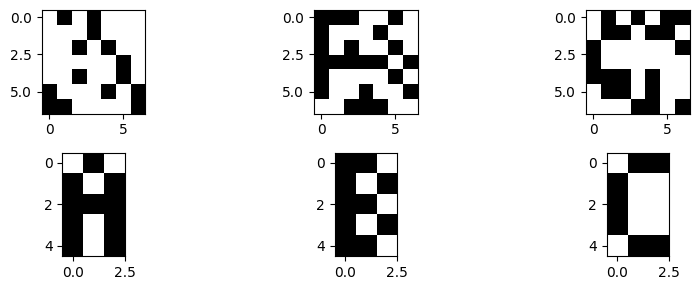

In [324]:
A_noisy = add_noise(A_77.copy(),10)
B_noisy = add_noise(B_77.copy(),10)
C_noisy = add_noise(C_77.copy(),10)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 30% noise

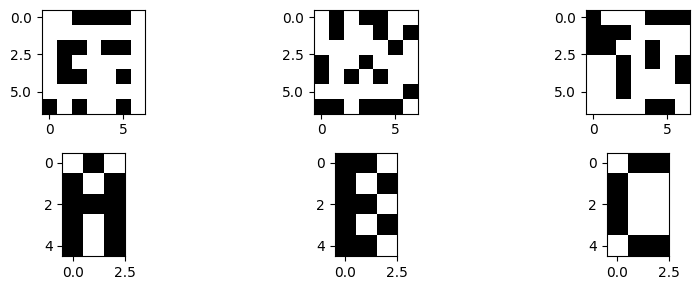

In [328]:
A_noisy = add_noise(A_77.copy(),15)
B_noisy = add_noise(B_77.copy(),15)
C_noisy = add_noise(C_77.copy(),15)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 40% noise

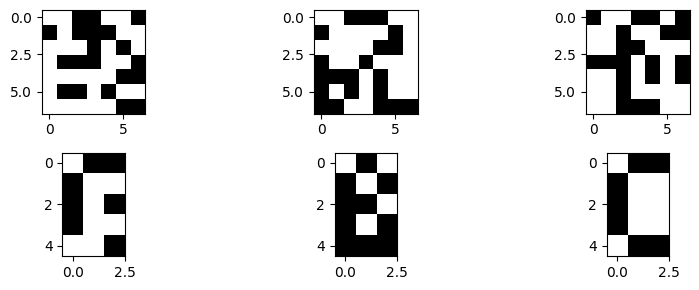

In [329]:
A_noisy = add_noise(A_77.copy(),20)
B_noisy = add_noise(B_77.copy(),20)
C_noisy = add_noise(C_77.copy(),20)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 50% noise

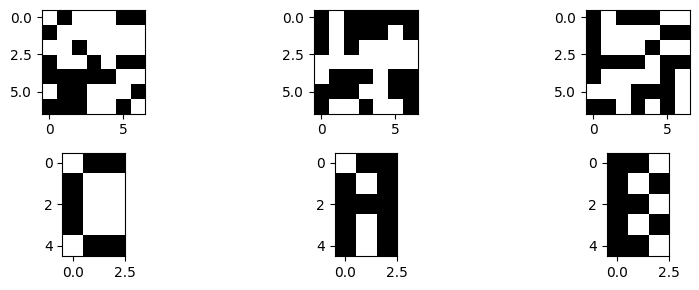

In [331]:
A_noisy = add_noise(A_77.copy(),25)
B_noisy = add_noise(B_77.copy(),25)
C_noisy = add_noise(C_77.copy(),25)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 70% noise

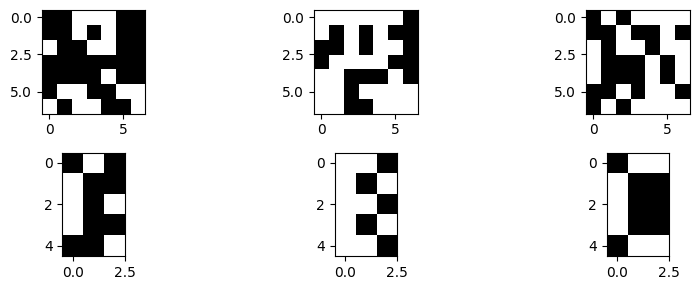

In [332]:
A_noisy = add_noise(A_77.copy(),34)
B_noisy = add_noise(B_77.copy(),34)
C_noisy = add_noise(C_77.copy(),34)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

#### 90% noise

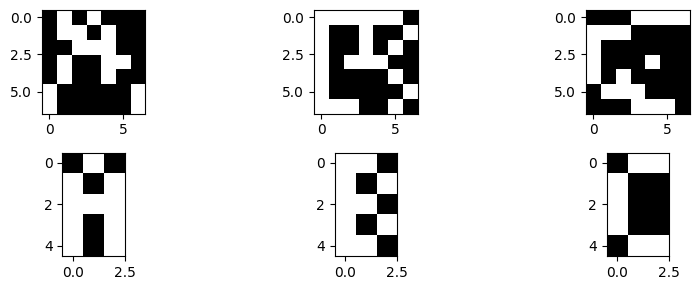

In [333]:
A_noisy = add_noise(A_77.copy(),44)
B_noisy = add_noise(B_77.copy(),44)
C_noisy = add_noise(C_77.copy(),44)

retrieved_A = Hebbian_map(A_noisy.copy())
retrieved_B = Hebbian_map(B_noisy.copy())
retrieved_C = Hebbian_map(C_noisy.copy())

plt.figure(figsize=(9, 3))

plt.subplot(2, 3, 1)
plt.imshow(A_noisy, cmap='gray')
plt.subplot(2, 3, 2)
plt.imshow(B_noisy, cmap='gray')
plt.subplot(2, 3, 3)
plt.imshow(C_noisy, cmap='gray')
plt.subplot(2, 3, 4)
plt.imshow(retrieved_A, cmap='gray')
plt.subplot(2, 3, 5)
plt.imshow(retrieved_B, cmap='gray')
plt.subplot(2, 3, 6)
plt.imshow(retrieved_C, cmap='gray')

plt.tight_layout()
plt.show()

Noise has a stronger effect on the inputs since it negatives the value of the noisy pixel. So the network's efficiency decreases for noisy datas